In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import geopandas as gp
import pysal
import seaborn as sns
import contextily
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
os.getcwd()

'/home/jovyan/work/AAA_Dissertation'

In [2]:
# import the analysis layer including all the geometry and demographic data
london = gp.GeoDataFrame.from_file('/home/jovyan/work/AAA_Dissertation/shapefile/analysis_layer2.shp')
london.head(3)

OBJECTID   LSOA11CD             LSOA11NM            LSOA11NMW   BNG_E  \
0         1  E01000001  City of London 001A  City of London 001A  532129   
1         2  E01000002  City of London 001B  City of London 001B  532480   
2         3  E01000003  City of London 001C  City of London 001C  532245   

    BNG_N     LONG       LAT     Shape__Are   Shape__Len  ...  SNum  proxC-CI  \
0  181625 -0.09706  51.51810  157794.481079  1685.391778  ...     0  0.000000   
1  181699 -0.09197  51.51868  164882.427628  1804.828196  ...     0  0.000000   
2  182036 -0.09523  51.52176   42219.805717   909.223277  ...     0  0.027968   

   PROXCI-CIS   divC-CI  divCI-CIS    area(h)  CINum  CISNum     IMD  \
0         0.0  0.068538        0.0  15.782165      0       0   6.208   
1         0.0  0.159155        0.0  16.491380      0       0   5.143   
2         0.0  0.131924        0.0   4.222692      0       0  19.402   

                                            geometry  
0  POLYGON ((-0.09475 51.52044, -0.09546 51.51529...  
1  POLYGON ((-0.08811 51.51926, -0.09546 51.51529...  
2  POLYGON ((-0.09454 51.52190, -0.09274 51.52124...  

[3 rows x 38 columns]

In [3]:
# import points of different food suppliers
chains = gp.GeoDataFrame.from_file('/home/jovyan/work/AAA_Dissertation/shapefile/chains.shp')
indep = gp.GeoDataFrame.from_file('/home/jovyan/work/AAA_Dissertation/shapefile/independent.shp')
special = gp.GeoDataFrame.from_file('/home/jovyan/work/AAA_Dissertation/shapefile/specialityfood.shp')

### choropleth maps (demographic)

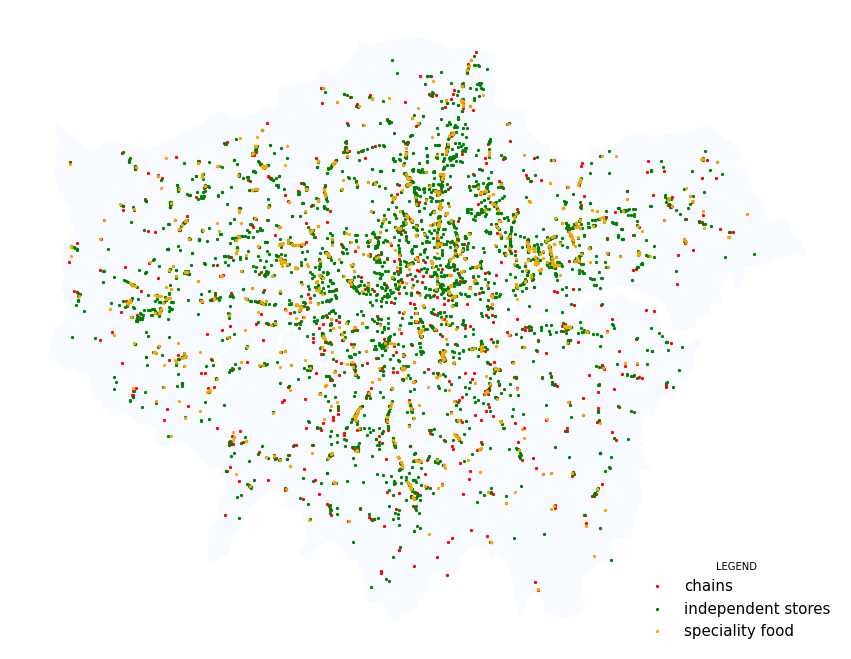

In [23]:
# population density choropleth map with points of food stores (try)
# issue: point legend cannot display
fig, ax = plt.subplots(figsize=(15,30))
ax.set_aspect('equal')

london.plot('popDent',
            ax=ax,
            cmap='Blues',
            k=5,   
            alpha = 1, 
            scheme='userdefined',
            classification_kwds={'bins':[0]},
            legend=True, 
            legend_kwds={'loc': 'lower right',
                         'fontsize':15, 
                         'edgecolor': 'white'})

chains.plot(ax=ax, marker='o', color='red', markersize=5, label='chains')
indep.plot(ax=ax, marker='o', color='green', markersize=5, label='independent stores')
special.plot(ax=ax, marker='o', color='orange', markersize=5, label='speciality food')

#ax.set(title='Popultion Density with Food Suppliers Location')

ax.legend(fontsize=15,
          frameon=False,
          loc=('lower right'),
          title="LEGEND")

ax.set_axis_off()
#plt.savefig("pop+poi.png",dpi=300)
plt.show()

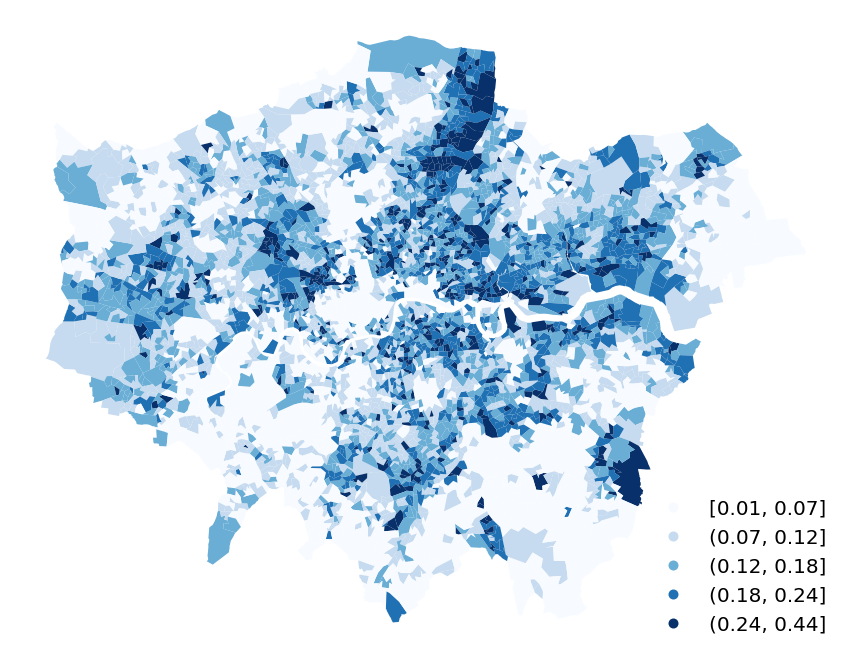

In [13]:
# income choropleth map, darker, means more deprived. (the proportion of people suffering lower income is higher.)
# legend title: "the porportion of people experiencing income deprivation"

fig, ax = plt.subplots(figsize=(15,30))
ax.set_aspect('equal')

london.plot('income',
            ax=ax,
            cmap='Blues',
            k=5,   
            alpha = 1, 
            scheme='FisherJenks',
            legend=True, 
            legend_kwds={'loc': 'lower right',
                         'fontsize':20, 
                         'edgecolor': 'white'})

ax.set_axis_off()
plt.savefig("income.png",dpi=300, bbox_inches='tight')
plt.show()

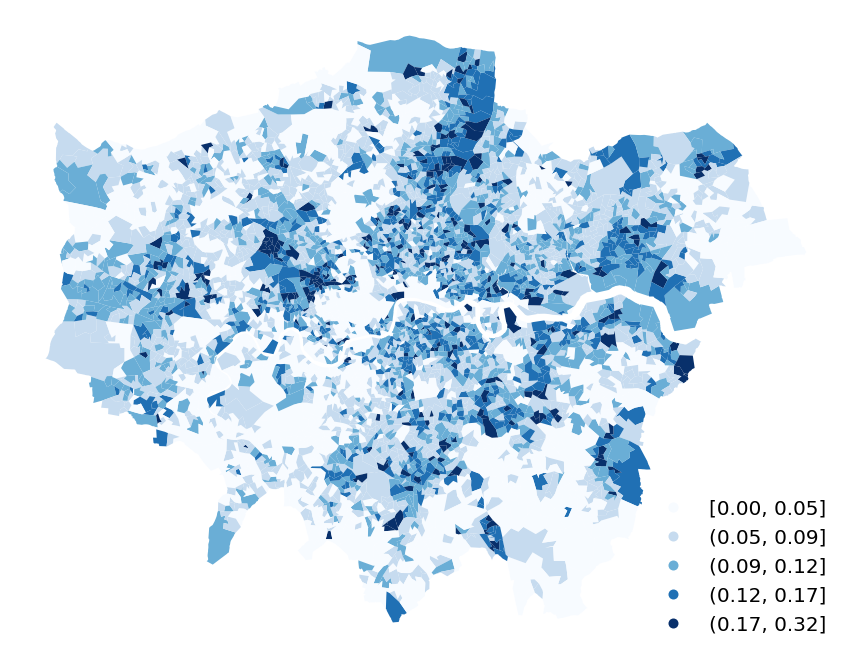

In [14]:
# employment choropleth map, darker, means more deprived. (the proportion of people suffering lower income is higher.)
# legend title: "the porportion of people experiencing employment deprivation"

fig, ax = plt.subplots(figsize=(15,30))
ax.set_aspect('equal')

london.plot('employment',
            ax=ax,
            cmap='Blues',
            k=5,   
            alpha = 1, 
            scheme='FisherJenks',
            legend=True, 
            legend_kwds={'loc': 'lower right',
                         'fontsize':20, 
                         'edgecolor': 'white'})

ax.set_axis_off()
plt.savefig("employment.png",dpi=300, bbox_inches='tight')
plt.show()

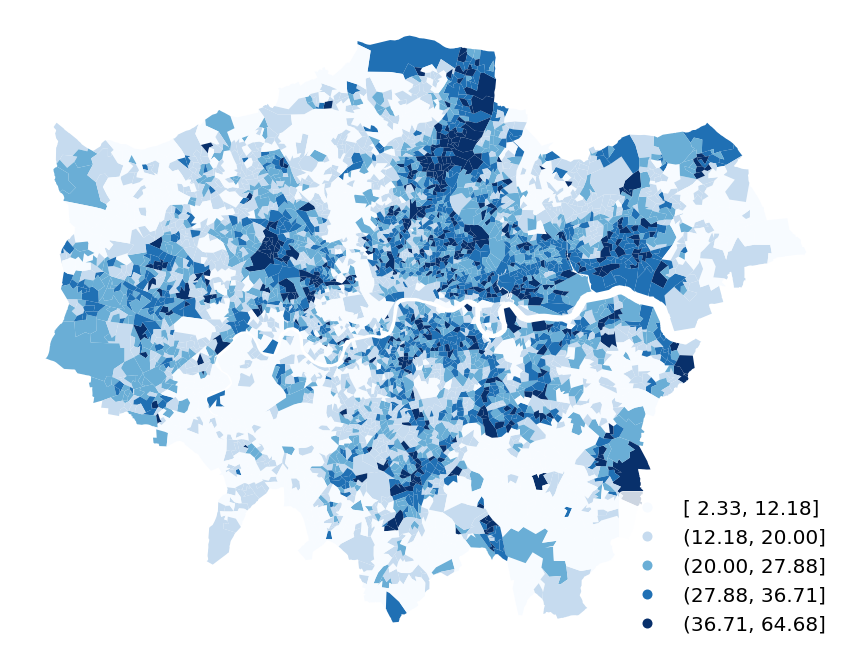

In [16]:
# index of multiple deprivation choropleth map, darker, means more deprived. (the proportion of people suffering lower income is higher.)
# legend title: "Index of Multiple Deprivation"

fig, ax = plt.subplots(figsize=(15,30))
ax.set_aspect('equal')

london.plot('IMD',
            ax=ax,
            cmap='Blues',
            k=5,   
            alpha = 1, 
            scheme='FisherJenks',
            legend=True, 
            legend_kwds={'loc': 'lower right',
                         'fontsize':20, 
                         'edgecolor': 'white'})

ax.set_axis_off()
plt.savefig("IMD.png",dpi=300, bbox_inches='tight')
plt.show()

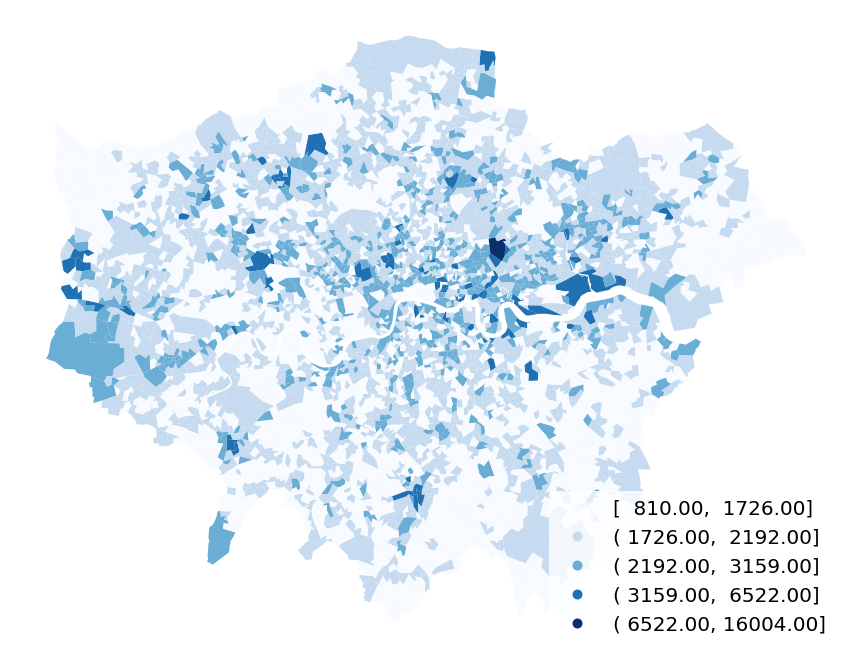

In [17]:
# pop choropleth map, darker, means more people.
# legend title: "population density (people/hectares)"

fig, ax = plt.subplots(figsize=(15,30))
ax.set_aspect('equal')

london.plot('pop',
            ax=ax,
            cmap='Blues',
            k=5,   
            alpha = 1, 
            scheme='FisherJenks',
            legend=True, 
            legend_kwds={'loc': 'lower right',
                         'fontsize':20, 
                         'edgecolor': 'white'})

ax.set_axis_off()
plt.savefig("pop.png",dpi=300, bbox_inches='tight')
plt.show()

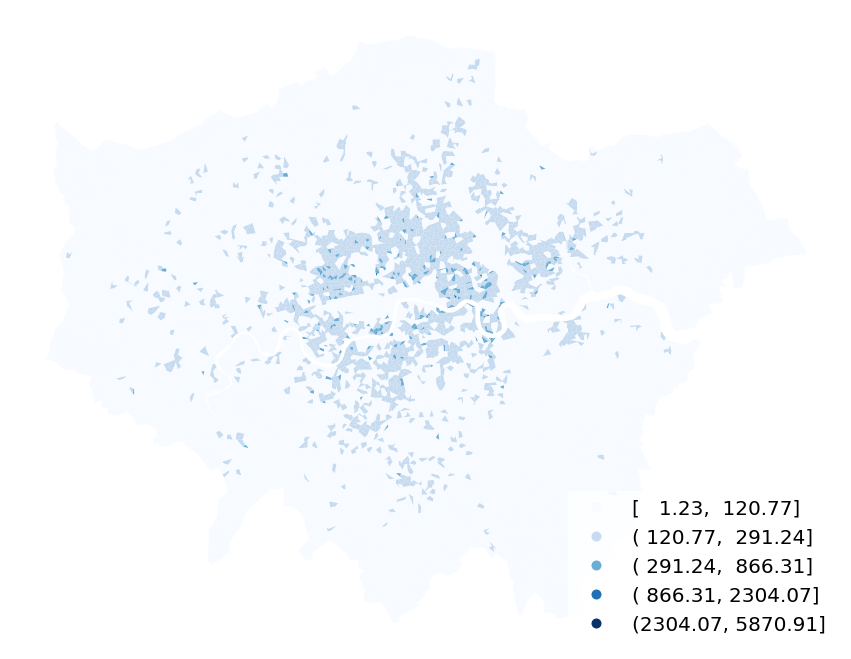

In [18]:
# pop density choropleth map, darker, means more people.
# legend title: "population density (people/hectares)"

fig, ax = plt.subplots(figsize=(15,30))
ax.set_aspect('equal')

london.plot('popDent',
            ax=ax,
            cmap='Blues',
            k=5,   
            alpha = 1, 
            scheme='FisherJenks',
            legend=True, 
            legend_kwds={'loc': 'lower right',
                         'fontsize':20, 
                         'edgecolor': 'white'})

ax.set_axis_off()
plt.savefig("popDense.png",dpi=300, bbox_inches='tight')
plt.show()

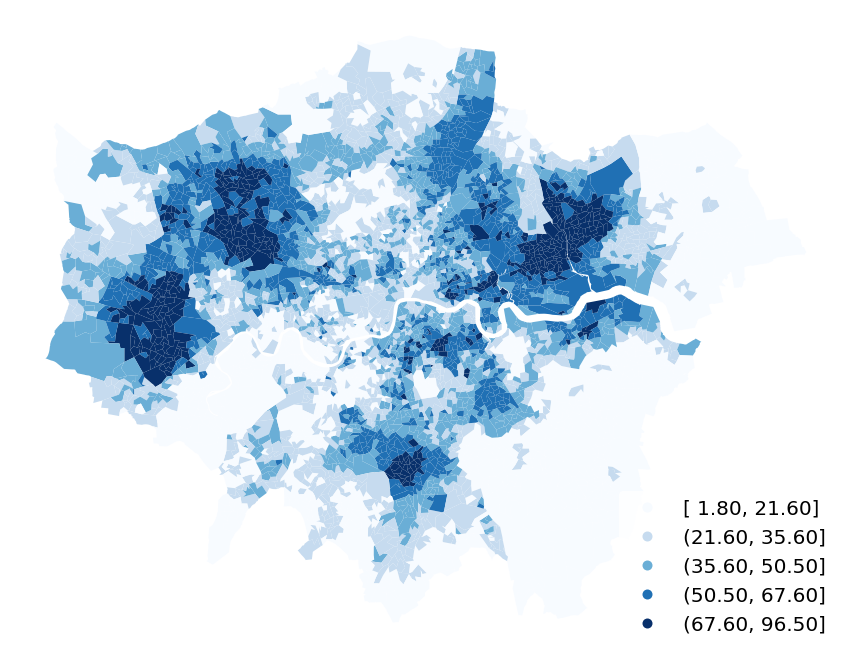

In [19]:
# ethnicity choropleth map (the brighter, more BAME)
# legend title: the proportion of ethnic minorities

fig, ax = plt.subplots(figsize=(15,30))
ax.set_aspect('equal')

london.plot('BAME%',
            ax=ax,
            cmap='Blues',
            k=5,   
            alpha = 1, 
            scheme='FisherJenks',
            legend=True, 
            legend_kwds={'loc': 'lower right',
                         'fontsize':20, 
                         'edgecolor': 'white'})

ax.set_axis_off()
plt.savefig("ethnicity.png",dpi=300, bbox_inches='tight')
plt.show()

### point pattern analysis

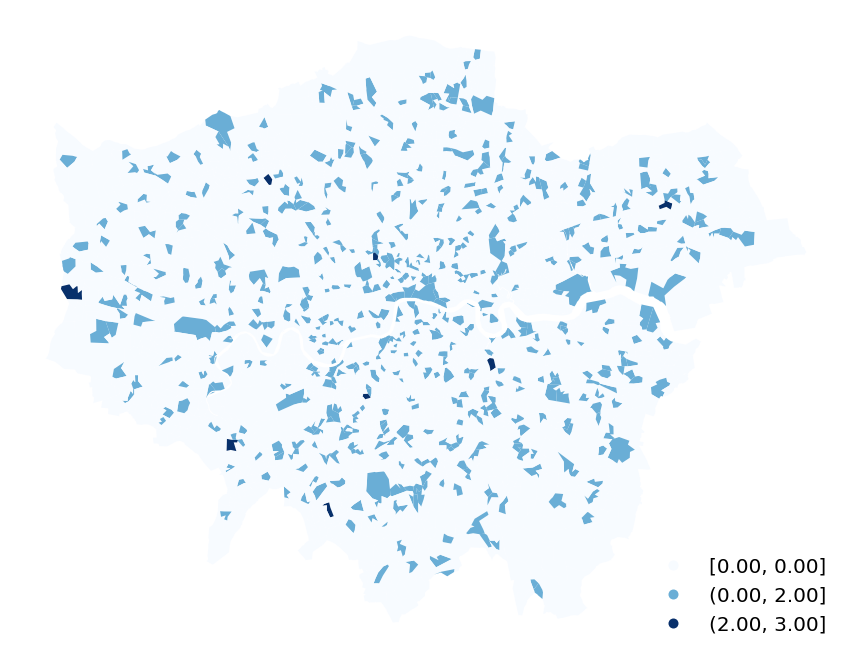

In [27]:
# point density of chains (visulisation of the number of food shops)
fig, ax = plt.subplots(figsize=(15,30))
ax.set_aspect('equal')
london.plot('CNum',
            ax=ax,
            cmap='Blues',
            alpha = 1, 
            scheme='userdefined',
            classification_kwds={'bins':[0, 2]},
            legend=True, 
            legend_kwds={'loc': 'lower right',
                        'fontsize':20, 
                         'edgecolor': 'white'})

ax.set_axis_off()
plt.savefig("CNum.png",dpi=300, bbox_inches='tight')
plt.show()

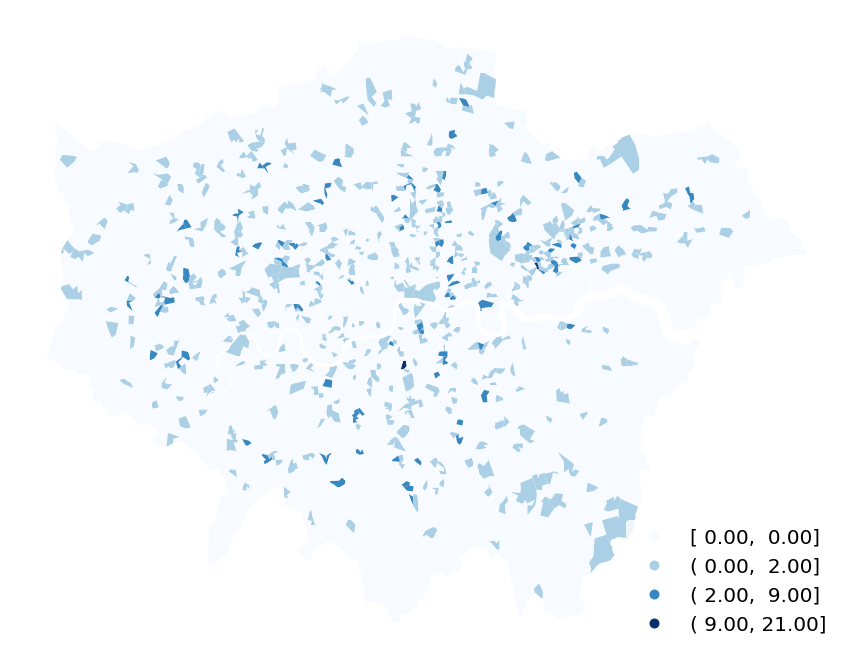

In [26]:
# point density of chains (visulisation of the number of food shops)

fig, ax = plt.subplots(figsize=(15,30))
ax.set_aspect('equal')

london.plot('SNum',
            ax=ax,
            cmap='Blues',
            k=4,   
            alpha = 1, 
            scheme='FisherJenks',
            legend=True, 
            legend_kwds={'loc': 'lower right',
                         'fontsize':20, 
                         'edgecolor': 'white'})

ax.set_axis_off()
#plt.savefig("ethnicity.png",dpi=300, bbox_inches='tight')
plt.show()

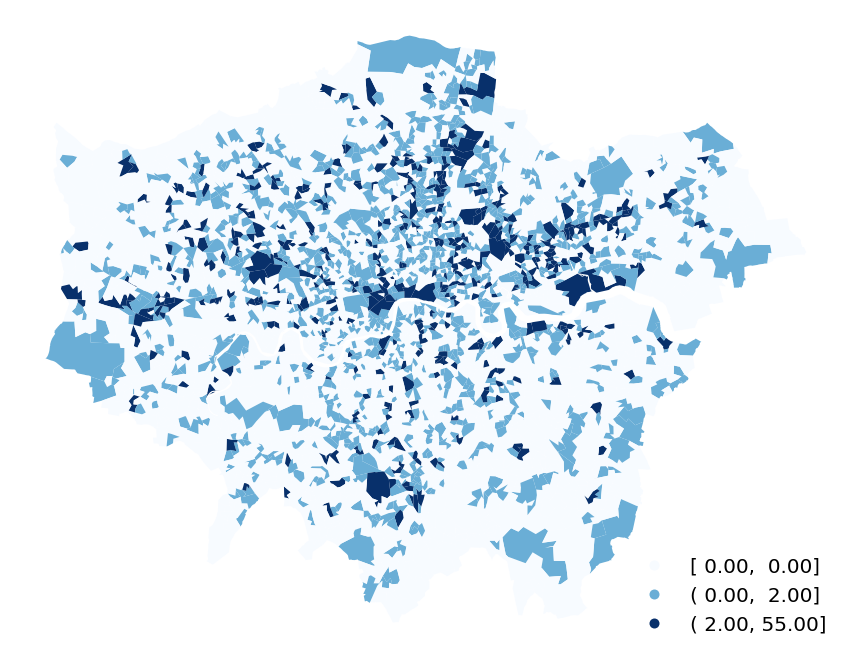

In [28]:
# point density of independent stores
fig, ax = plt.subplots(figsize=(15,30))
ax.set_aspect('equal')
london.plot('INum',
            ax=ax,
            cmap='Blues',
            alpha = 1, 
            scheme='userdefined',
            classification_kwds={'bins':[0, 2]},
            legend=True, 
            legend_kwds={'loc': 'lower right',
                         'fontsize':20, 
                         'edgecolor': 'white'})

ax.set_axis_off()
plt.savefig("INum.png",dpi=300, bbox_inches='tight')
plt.show()

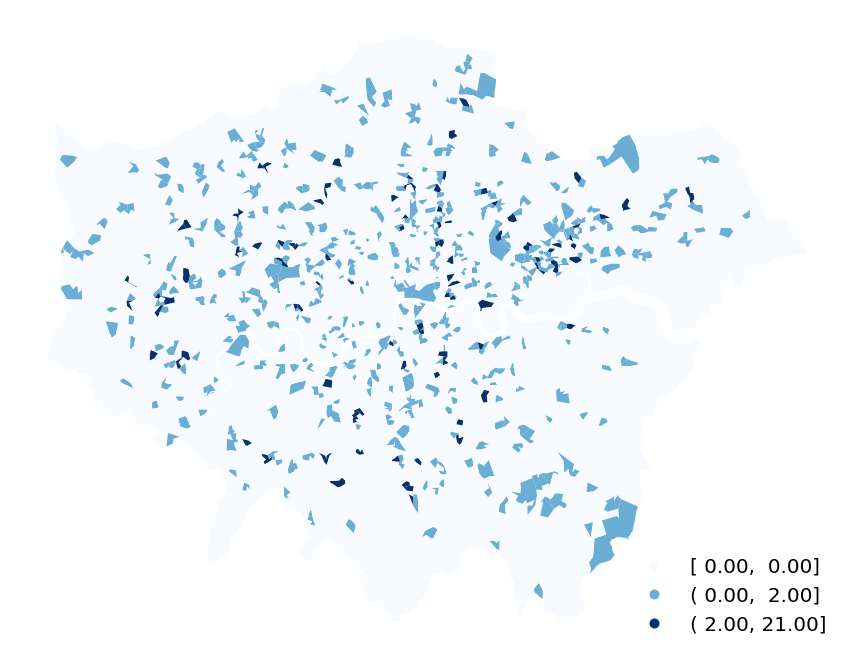

In [29]:
# point density of specialty stores
fig, ax = plt.subplots(figsize=(15,30))
ax.set_aspect('equal')
london.plot('SNum',
            ax=ax,
            cmap='Blues',
            alpha = 1, 
            scheme='userdefined',
            classification_kwds={'bins':[0, 2]},
            legend=True, 
            legend_kwds={'loc': 'lower right',
                         'fontsize':20, 
                         'edgecolor': 'white'})

ax.set_axis_off()
plt.savefig("SNum.png",dpi=300, bbox_inches='tight')
plt.show()

### Accessibility - proximity

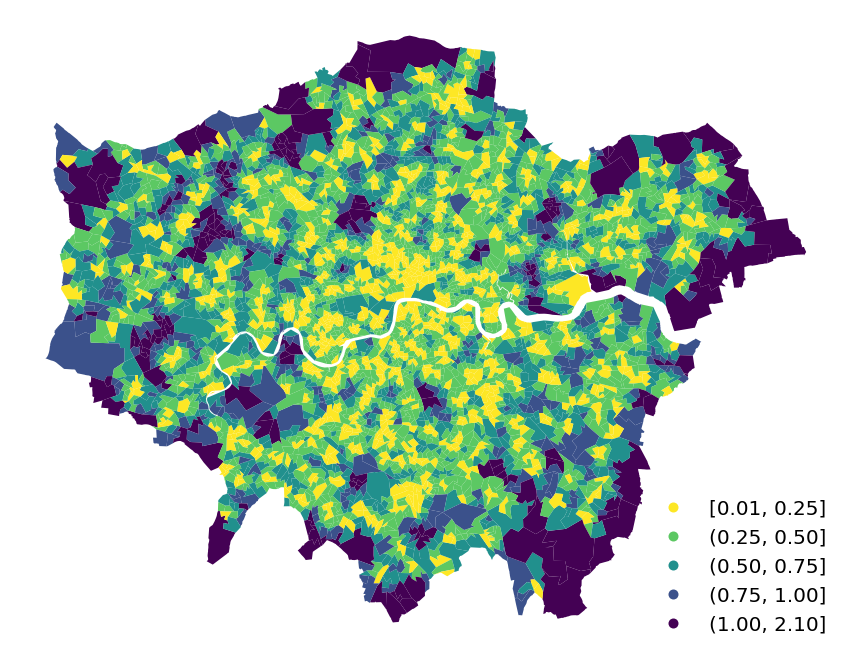

In [30]:
# food accessibility - proximity - distances to the nearest chains
fig, ax = plt.subplots(figsize=(15,30))
ax.set_aspect('equal')

london.plot('toC',
            ax=ax,
            cmap='viridis_r',
            k=5,   
            alpha = 1, 
            scheme='userdefined', 
            classification_kwds={'bins':[0.25, 0.5, 0.75, 1.0]},  # 数值代表到最邻近商店的距离，miles，值越大距离越大，可达性越差
            legend=True, 
            legend_kwds={'loc': 'lower right',
                         'fontsize':20, 
                         'edgecolor': 'white'})

ax.set_axis_off()
plt.savefig("proximityC.png",dpi=300, bbox_inches='tight')
plt.show()

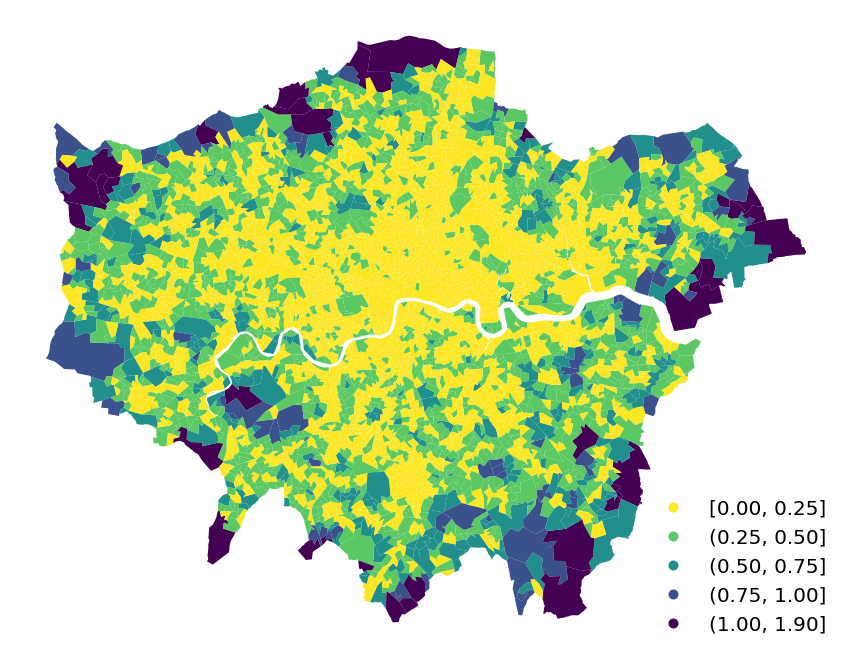

In [31]:
# food accessibility - proximity - distances to the nearest chains & independent stores
fig, ax = plt.subplots(figsize=(15,30))
ax.set_aspect('equal')

london.plot('toCI',
            ax=ax,
            cmap='viridis_r',
            k=5,   
            alpha = 1, 
            scheme='userdefined', 
            classification_kwds={'bins':[0.25, 0.5, 0.75, 1.0]},  # 数值代表到最邻近商店的距离，miles，值越大距离越大，可达性越差
            legend=True, 
            legend_kwds={'loc': 'lower right',
                         'fontsize':20, 
                         'edgecolor': 'white'})

ax.set_axis_off()
plt.savefig("proximityCI.png",dpi=300, bbox_inches='tight')
plt.show()

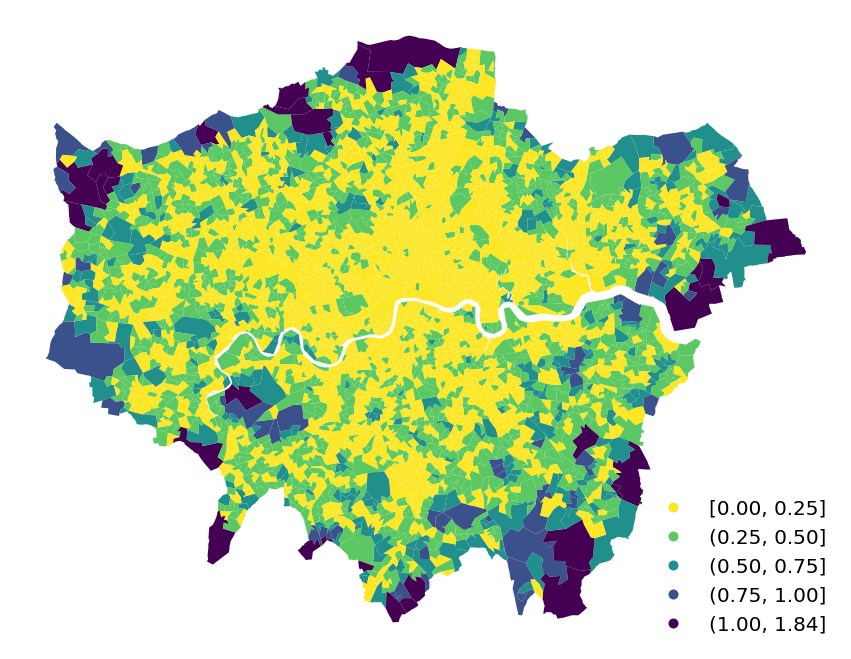

In [32]:
# food accessibility - proximity - distances to the nearest chains & independent stores & speciality food stores
fig, ax = plt.subplots(figsize=(15,30))
ax.set_aspect('equal')

london.plot('toCIS',
            ax=ax,
            cmap='viridis_r',
            k=6,   
            alpha = 1, 
            scheme='userdefined', 
            classification_kwds={'bins':[0.25, 0.5, 0.75, 1.0]},  # 数值代表到最邻近商店的距离，miles，值越大距离越大，可达性越差
            legend=True, 
            legend_kwds={'loc': 'lower right',
                         'fontsize':20, 
                         'edgecolor': 'white'})

ax.set_axis_off()
plt.savefig("proximityCIS.png",dpi=300, bbox_inches='tight')
plt.show()

### Accessibility - diversity

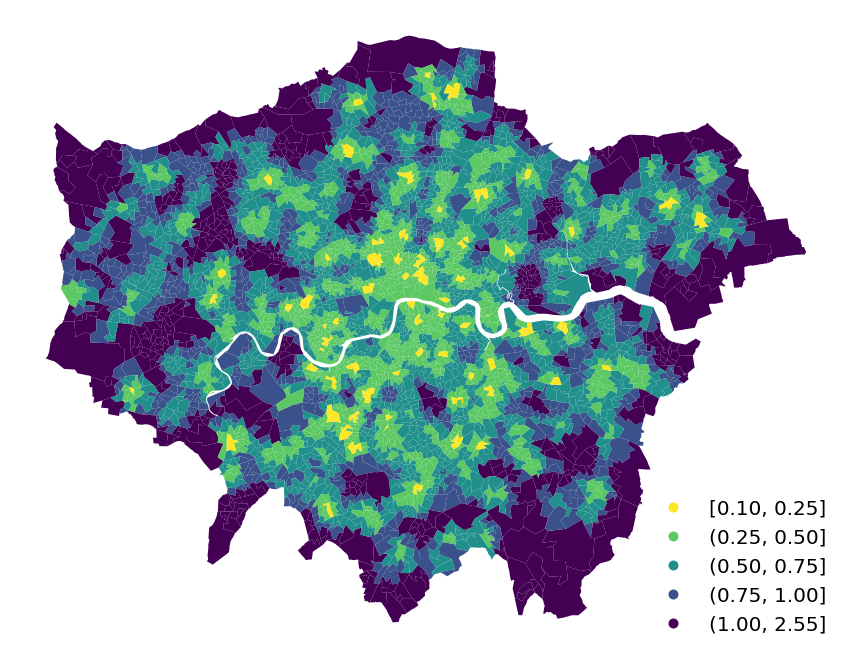

In [33]:
# food accessibility - diversity - mean distances to the nearest 3 chains
fig, ax = plt.subplots(figsize=(15,30))
ax.set_aspect('equal')

london.plot('divC',
            ax=ax,
            cmap='viridis_r',
            k=5,   
            alpha = 1, 
            scheme='userdefined', 
            classification_kwds={'bins':[0.25, 0.5, 0.75, 1.0]},  # 数值代表到最邻近的三个商店的平均距离，miles，值越大距离越大，多样性越差
            legend=True, 
            legend_kwds={'loc': 'lower right',
                         'fontsize':20, 
                         'edgecolor': 'white'})

ax.set_axis_off()
plt.savefig("varietyC.png",dpi=300, bbox_inches='tight')
plt.show()

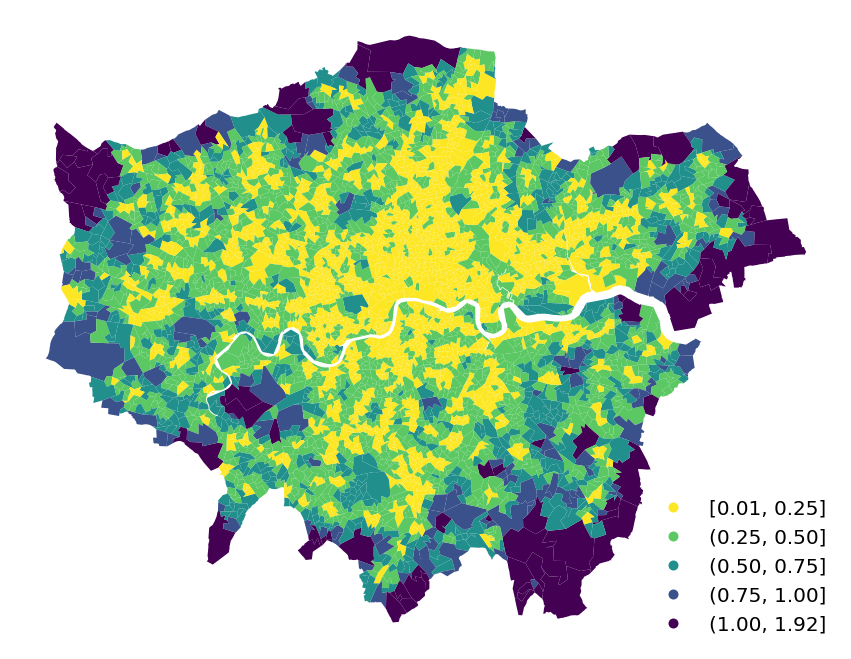

In [34]:
# food accessibility - diversity - mean distances to the nearest 3 chains & independent
fig, ax = plt.subplots(figsize=(15,30))
ax.set_aspect('equal')

london.plot('divCI',
            ax=ax,
            cmap='viridis_r',
            k=5,   
            alpha = 1, 
            scheme='userdefined', 
            classification_kwds={'bins':[0.25, 0.5, 0.75, 1.0]},  # 数值代表到最邻近的三个商店的平均距离，miles，值越大距离越大，多样性越差
            legend=True, 
            legend_kwds={'loc': 'lower right',
                         'fontsize':20, 
                         'edgecolor': 'white'})

ax.set_axis_off()
plt.savefig("varietyCI.png",dpi=300, bbox_inches='tight')
plt.show()

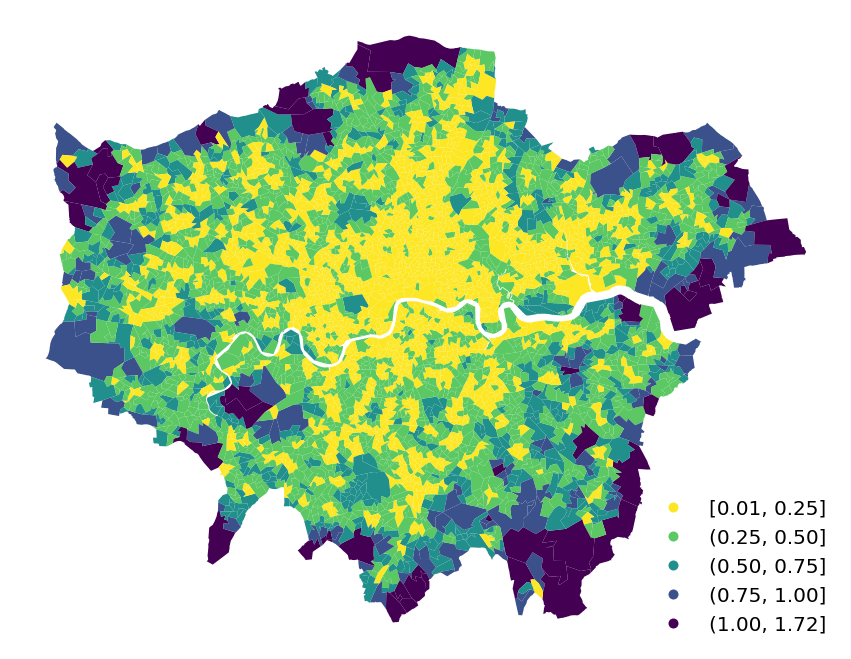

In [35]:
# food accessibility - diversity - mean distances to the nearest 3 chains & independent & speciality
fig, ax = plt.subplots(figsize=(15,30))
ax.set_aspect('equal')

london.plot('divCIS',
            ax=ax,
            cmap='viridis_r',
            k=5,   
            alpha = 1, 
            scheme='userdefined', 
            classification_kwds={'bins':[0.25, 0.5, 0.75, 1.0]},  # 数值代表到最邻近的三个商店的平均距离，miles，值越大距离越大，多样性越差
            legend=True, 
            legend_kwds={'loc': 'lower right',
                         'fontsize':20, 
                         'edgecolor': 'white'})

ax.set_axis_off()
plt.savefig("varietyCIS.png",dpi=300, bbox_inches='tight')
plt.show()

In [38]:
london['IMD'].describe()

count    4835.000000
mean       21.498424
std        10.904741
min         2.326000
25%        12.446500
50%        20.375000
75%        29.597500
max        64.677000
Name: IMD, dtype: float64

In [4]:
data=pd.read_csv('analysis_data.csv')
data.describe()

Pop  Pop Density  Ethnic Minorities       Income   Employment  \
count   4835.000000  4835.000000        4835.000000  4835.000000  4835.000000   
mean    1853.565460   116.939988          39.288852    13.617642     8.736381   
std      477.267764   137.013957          20.353643     7.572683     4.675450   
min      810.000000     1.231637           1.800000     0.600000     0.300000   
25%     1592.000000    54.680504          22.400000     7.500000     5.100000   
50%     1765.000000    90.518404          36.900000    12.500000     7.900000   
75%     2007.000000   147.938387          54.100000    18.900000    11.700000   
max    16004.000000  5870.907139          96.500000    43.700000    31.700000   

               IMD    Num of Cs   Num of  Is    Num of Ss  
count  4835.000000  4835.000000  4835.000000  4835.000000  
mean     21.498424     0.134023     0.665357     0.220683  
std      10.904741     0.388379     1.767082     0.806666  
min       2.326000     0.000000     0.000000     0.000000  
25%      12.446500     0.000000     0.000000     0.000000  
50%      20.375000     0.000000     0.000000     0.000000  
75%      29.597500     0.000000     1.000000     0.000000  
max      64.677000     3.000000    50.000000    21.000000

In [5]:
data.skew()

Pop                   7.297166
Pop Density          18.504390
Ethnic Minorities     0.419866
Income                0.530673
Employment            0.741895
IMD                   0.396688
Num of Cs             3.162427
Num of  Is           10.490369
Num of Ss             8.433614
dtype: float64

In [45]:
london['IMD'].skew()

0.39668793097495086

<AxesSubplot:>

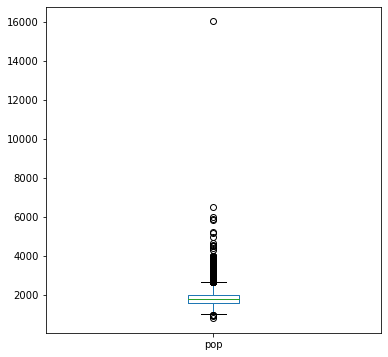

In [61]:
london['pop'].plot.box(figsize=(6,6))

<AxesSubplot:ylabel='IMD'>

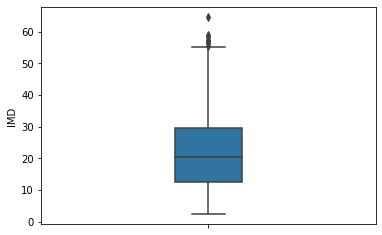

In [9]:
# pop popDent BAME% income employment CNum INum SNum toC toCI toCIS divC divCI divCIS
sns.boxplot(y=london['IMD'],width=0.2,fliersize=5)

<AxesSubplot:ylabel='Frequency'>

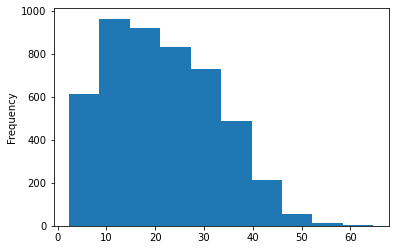

In [47]:
london['IMD'].plot.hist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pop                4835 non-null   int64  
 1   Pop Density        4835 non-null   float64
 2   Ethnic Minorities  4835 non-null   float64
 3   Income             4835 non-null   float64
 4   Employment         4835 non-null   float64
 5   IMD                4835 non-null   float64
 6   Num of Cs          4835 non-null   int64  
 7   Num of  Is         4835 non-null   int64  
 8   Num of Ss          4835 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 340.1 KB


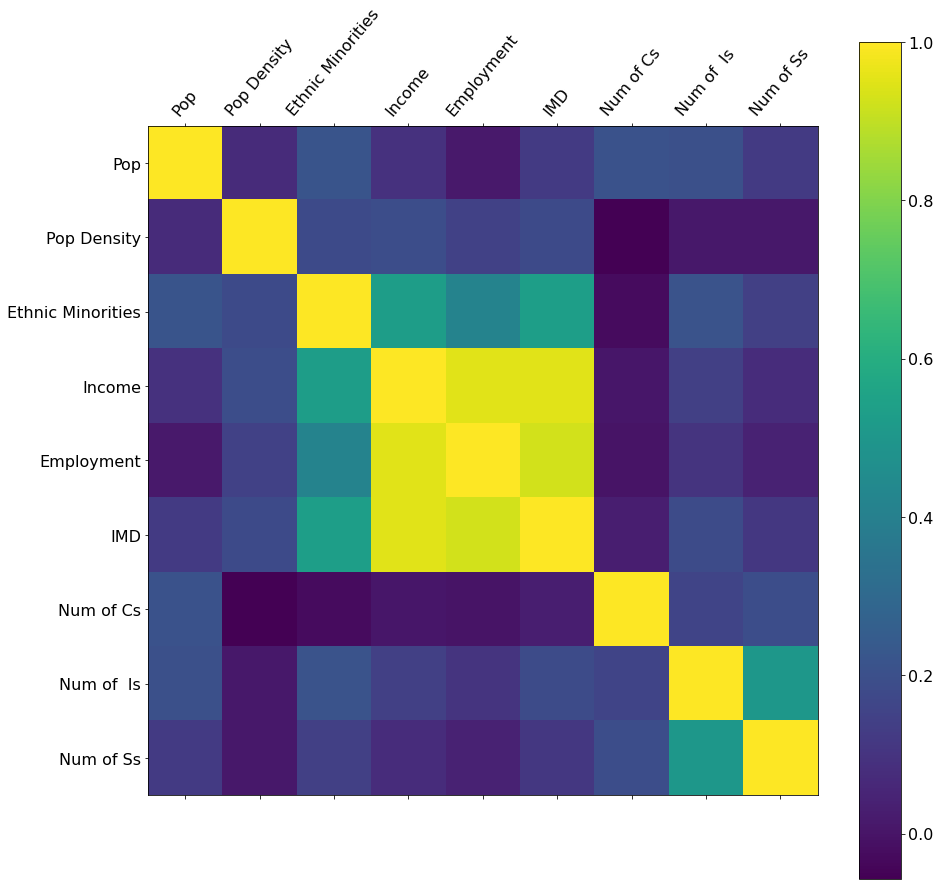

In [10]:
# correlation matrix, OK
data.info()

df = data
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(15, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=16, rotation=50)
plt.yticks(range(df.shape[1]), df.columns, fontsize=16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
#plt.title('Correlation Matrix', fontsize=16)

plt.savefig("CorrelationMarix.png",dpi=150, bbox_inches='tight')
plt.show()

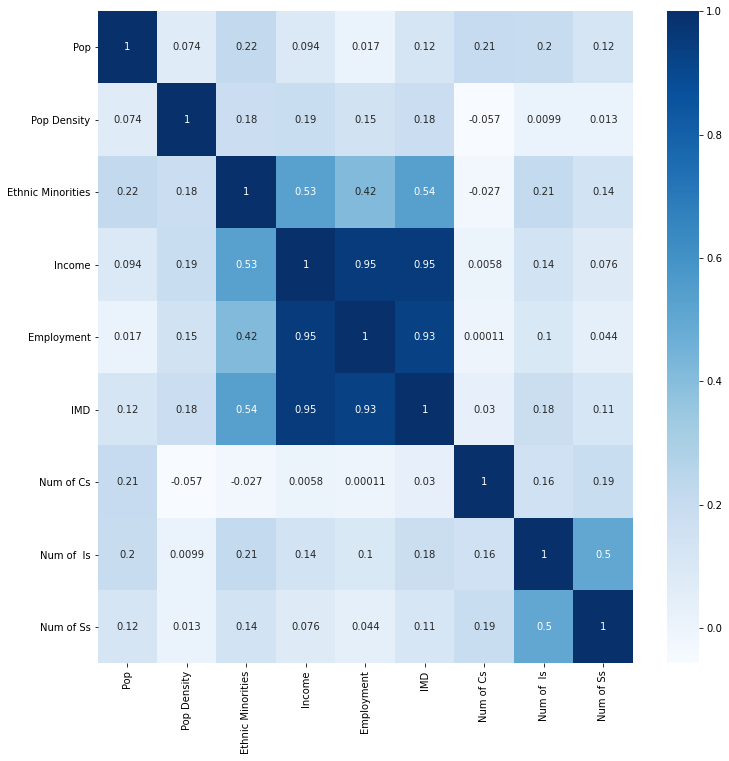

In [20]:
fig, ax = plt.subplots(figsize = (12,12))
corr = df.corr()
sns.heatmap(corr, cmap='Blues', annot=True)
plt.savefig("CorrelationMarix2.png",dpi=150, bbox_inches='tight')
plt.show()